# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 6

Utilizando o dataset Mushroom Classification disponível no repositório da disciplina e em https://www.kaggle.com/uciml/mushroom classification
construa um classificador Naive Bayes (Gaussiano ou não) que classifique as amostras em cogumelos comestíveis ou não.

Avalie as características do problema para eliminar as que não agregam capacidade decisória ao classificador.

Avalie a precisão, acurácia do classificador. Verifique o tempo de execução.

In [1]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável. Neste caso usei um diretório local.
dataset = pd.read_csv('data/6_mushrooms.csv', sep=',' , engine='python', error_bad_lines=False)

#Visualização das 10 primeiras linhas do dataset
dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


## É possivel verificar que as variáveis são categóricas. Assim, precisaremos tratá-las com dummies ou OnHotEncoding

In [3]:
# Verificando se tem dados nulos, para limpeza
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
#Informações gerais do dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#verificar a qtd de variações de algumas caracteristicas / variaveis
dataset['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [6]:
dataset['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [7]:
dataset['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [8]:
dataset['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

In [9]:
dataset['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

## Apenas com estes exemplos, é possível verificar que há concentrações em tipos de caracteristicas, sendo que outras são bem menos representativas. Isso pode gerar um viés no modelo.

In [10]:
#transformar as variaveis categorticas em dummies
dataset_dmy = pd.get_dummies(dataset)
dataset_dmy.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


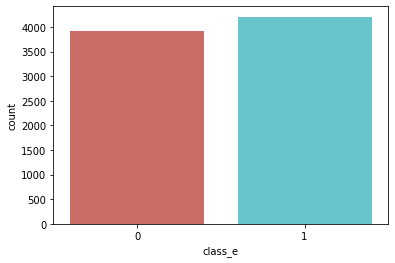

In [11]:
sb.countplot(x='class_e',data=dataset_dmy, palette='hls')

In [12]:
dataset_dmy.isnull().sum()

class_e        0
class_p        0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 119, dtype: int64

In [13]:
dataset_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


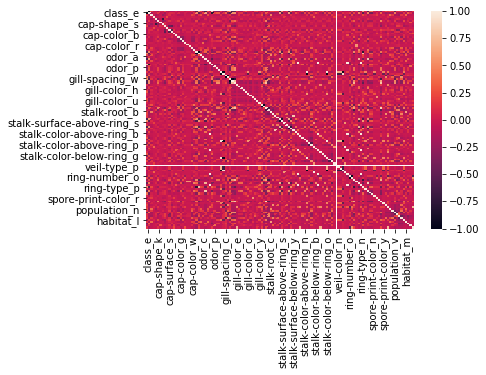

In [14]:
# Validando independência entre as variáveis
sb.heatmap(dataset_dmy.corr())  

## Dado o volume de variáveis, não foi possível analisar graficamente a correlação entre elas

## Vamos separar X e Y, sendo desconsiderada a coluna [:.1], pois é o "inverso" da dummy Y, que queremos prever

In [15]:
X = dataset_dmy.iloc[:,2:].values
y = dataset_dmy.iloc[:,0].values

## Agora divimos entre treino e teste (teste com 30%)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [17]:
#classificador Naive Bayes Gaussiano
NBG = GaussianNB()
NBG.fit(X_train, y_train)

#Em caso de datasets muitos granges é possível utilizar a função partial_fit
#classificador.partial_fit(X_train, y_train)
#mas não vou usar nesse exercicio

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
#obtier o Y predito
y_pred = NBG.predict(X_test)

In [19]:
#matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1177    0]
 [  84 1177]]


## Pela matriz de confusão, o erro é baixo.

In [20]:
#avaliação do modelo
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

precision    recall  f1-score   support

           0       0.93      1.00      0.97      1177
           1       1.00      0.93      0.97      1261

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438

0.9655455291222313


## Como antecipada pela análise da matriz de confusão, a acurácia é alta, com precisão e recall altos